In [3]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import torch 
from torchvision import datasets,transforms
import torchvision
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
trans = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))]
                   )
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, 
                   download=True, 
                   transform=trans,), 
                   batch_size=100, 
                   shuffle=True, 
                   num_workers=1,
                  
)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', 
                   train=False,
                   download=True,
                   transform = trans,),
                   batch_size=100,
                   shuffle=True,
                   num_workers=1,
)

In [3]:
iter(train_loader).next()

[
 ( 0 , 0 ,.,.) = 
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
            ...             ⋱             ...          
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
       ⋮  
 
 ( 1 , 0 ,.,.) = 
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
            ...             ⋱             ...          
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
       ⋮  
 
 ( 2 , 0 ,.,.) = 
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4

torch.Size([100, 1, 28, 28])


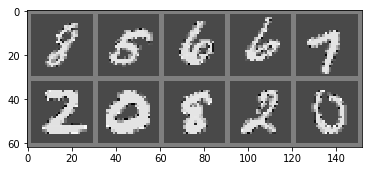

[ 8 ,   5 ,   6 ,   6 ,   7 ,   2 ,   0 ,   8 ,   2 ,   0 ]


In [4]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
def imshow(img):
#     if use_gpu: img=img.cpu()
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
#     Permute the axes 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# trainloader, classes = get_data()
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.size())
images, labels = images[0:10], labels[0:10]

imshow(torchvision.utils.make_grid(images, nrow=5))
print(" ".join("%3s" % list(labels)))#classes[labels[j]] for j in range(len(labels))))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64,10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
        #return x
    
    
   


In [6]:
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
params = list(model.parameters())
print(len(params))
print(params[0].size()) 

6
torch.Size([256, 784])


In [8]:
input = Variable(torch.randn(1,784),requires_grad = True)
out = model(input)
print(out)

Variable containing:
-2.1643 -2.0439 -2.2187 -2.2223 -2.4802 -2.5107 -2.3653 -2.5184 -2.3877 -2.2326
[torch.FloatTensor of size 1x10]



In [9]:
model.zero_grad()
out.backward(torch.randn(1, 10))

In [10]:
output = model(input)
print(output)
target = Variable(torch.arange(0, 10))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
-2.1643 -2.0439 -2.2187 -2.2223 -2.4802 -2.5107 -2.3653 -2.5184 -2.3877 -2.2326
[torch.FloatTensor of size 1x10]

Variable containing:
 55.2077
[torch.FloatTensor of size 1]



In [11]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [12]:
iterator = iter(train_loader)

In [13]:
data, label = iterator.next()

In [14]:
data = data.view(100,-1)

In [15]:
output = model(Variable(data))
print(output)

Variable containing:
-2.3258 -2.0061 -2.2335  ...  -2.5799 -2.2567 -2.1853
-2.3818 -2.0216 -2.1463  ...  -2.3809 -2.2904 -2.2171
-2.2332 -2.0129 -2.1679  ...  -2.5411 -2.3588 -2.2955
          ...             ⋱             ...          
-2.3776 -2.0416 -2.2241  ...  -2.5861 -2.2415 -2.1848
-2.3335 -2.1082 -2.1790  ...  -2.5604 -2.2617 -2.1984
-2.3612 -2.1233 -2.1739  ...  -2.5059 -2.2984 -2.2662
[torch.FloatTensor of size 100x10]



In [16]:
model.zero_grad()
loss.backward()

In [17]:
learning_rate = 0.01
for f in model.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [18]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [19]:
batch_size = 100
num_epochs = 10
for s in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
    

        # zero the parameter gradients
        model.zero_grad()
    
        optimizer.zero_grad()

        # forward + backward + optimize
        inputs = inputs.view(100,-1)
        outputs = model(inputs)
    
        target = Variable(torch.zeros(100, 10))  # a dummy target, for example
    
        for k in range(100):
            m = int(labels[k])
            target[k,m] = 1
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

In [20]:
dataiter2 = iter(test_loader)
inputst, labelst = dataiter2.next()

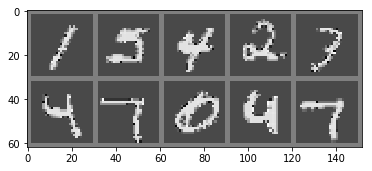

[ 1 ,   5 ,   4 ,   2 ,   3 ,   4 ,   7 ,   0 ,   4 ,   7 ]


In [21]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
def imshow(img):
#     if use_gpu: img=img.cpu()
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
#     Permute the axes 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# testloader, classes = get_data()
inputst1, labelst1 = inputst[0:10], labelst[0:10]
imshow(torchvision.utils.make_grid(inputst1, nrow=5))
print(" ".join("%3s" % list(labelst1)))#classes[labels[j]] for j in range(len(labels))))

In [22]:
inputst1, labelst1 = Variable(inputst1), Variable(labelst1)

# zero the parameter gradients
model.zero_grad()

inputst1 = inputst1.view(10,-1)



# forward + backward + optimize

outputst1 = model(inputst1)

In [23]:
outputst1

Variable containing:
-2.3416 -2.0678 -2.3745 -2.3215 -2.3261 -2.3362 -2.3114 -2.3230 -2.3592 -2.3005
-2.2232 -2.3412 -2.2981 -2.2685 -2.4140 -2.2644 -2.2933 -2.2544 -2.3122 -2.3714
-2.3815 -2.3564 -2.3886 -2.3771 -1.9921 -2.3542 -2.3056 -2.3868 -2.2630 -2.2906
-2.3353 -2.3197 -2.1262 -2.3809 -2.2793 -2.3297 -2.2838 -2.3018 -2.3483 -2.3437
-2.3343 -2.2994 -2.3265 -2.2734 -2.3091 -2.3099 -2.3282 -2.2197 -2.3556 -2.2765
-2.3305 -2.3140 -2.3769 -2.2862 -2.1898 -2.3199 -2.2731 -2.3265 -2.2995 -2.3204
-2.3533 -2.3451 -2.2945 -2.3002 -2.3318 -2.3312 -2.3196 -2.1035 -2.3581 -2.3146
-2.1651 -2.3780 -2.3020 -2.2793 -2.2635 -2.3174 -2.2981 -2.4028 -2.2856 -2.3542
-2.2988 -2.3272 -2.2430 -2.3998 -2.1263 -2.3337 -2.3305 -2.3530 -2.3335 -2.3059
-2.3099 -2.3371 -2.2996 -2.3378 -2.3514 -2.3602 -2.3600 -2.0827 -2.2806 -2.3391
[torch.FloatTensor of size 10x10]

In [24]:
_,predicted = torch.max(outputst1.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))


Predicted:      1     0     4     2     7     4     7     0     4     7


In [25]:
correct = 0
total = 0
for i, data in enumerate(test_loader, 0):
    images, labels = data
    images = images.view(100,-1)
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

In [26]:
print('Accuracy of the network on the 600 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 600 test images: 89.380000 %


In [27]:
dataiter2 = iter(train_loader)
inputst, labelst = dataiter2.next()

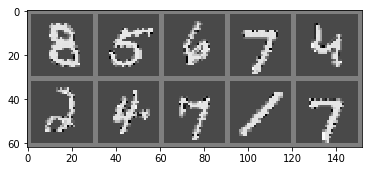

[ 8 ,   5 ,   6 ,   7 ,   4 ,   2 ,   4 ,   7 ,   1 ,   7 ]


In [28]:
inputst1, labelst1 = inputst[0:10], labelst[0:10]
imshow(torchvision.utils.make_grid(inputst1, nrow=5))
print(" ".join("%3s" % list(labelst1)))#classes[labels[j]] for j in range(len(labels))))

In [29]:
inputst1, labelst1 = Variable(inputst1), Variable(labelst1)

In [30]:
model(inputst1.view(10,-1))

Variable containing:
-2.3442 -2.3393 -2.2531 -2.2789 -2.3329 -2.2587 -2.2822 -2.3380 -2.2901 -2.3139
-2.3075 -2.3464 -2.3198 -2.2961 -2.2953 -2.1211 -2.3070 -2.3389 -2.3428 -2.3734
-2.3464 -2.3165 -2.2942 -2.3589 -2.3056 -2.3157 -2.1033 -2.2933 -2.3598 -2.3593
-2.3305 -2.3257 -2.3514 -2.3273 -2.3586 -2.3432 -2.3154 -2.0528 -2.3212 -2.3390
-2.3494 -2.3658 -2.3321 -2.3443 -2.0797 -2.3025 -2.2970 -2.3758 -2.3133 -2.2998
-2.3042 -2.3299 -2.1475 -2.3129 -2.2530 -2.3445 -2.3052 -2.3423 -2.3644 -2.3405
-2.2765 -2.2599 -2.3380 -2.3860 -2.2154 -2.3397 -2.2840 -2.3227 -2.3044 -2.3096
-2.3586 -2.3212 -2.3341 -2.3113 -2.2116 -2.3733 -2.3426 -2.1103 -2.3443 -2.3500
-2.3318 -2.1979 -2.2477 -2.3146 -2.3186 -2.3517 -2.3467 -2.3322 -2.2731 -2.3227
-2.3289 -2.3311 -2.3262 -2.3516 -2.3526 -2.3675 -2.3112 -1.9926 -2.3522 -2.3747
[torch.FloatTensor of size 10x10]

In [31]:
correct = 0
total = 0
for i, data in enumerate(train_loader, 0):
    images, labels = data
    images = images.view(100,-1)
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

In [32]:
print('Accuracy of the network on the 600 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 600 test images: 89.511667 %
